In [1]:
!pip install --upgrade pip
!pip install mne

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------- ----------------------- 3.1/7.5 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 25.6 MB/s  0:00:00

   ---------------------------------------- 0/2 [pooch]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   -------------------- ------------------- 1/2 [mne]
   ------------------

In [2]:
# Verify the installation
import mne
print(mne.__version__)

1.11.0


In [3]:
import mne

In [6]:
#Install & show the MNE data sample
data_path = mne.datasets.sample.data_path()
print(data_path)

C:\Users\SJA_010525-01\mne_data\MNE-sample-data


Opening raw data file C:\Users\SJA_010525-01\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


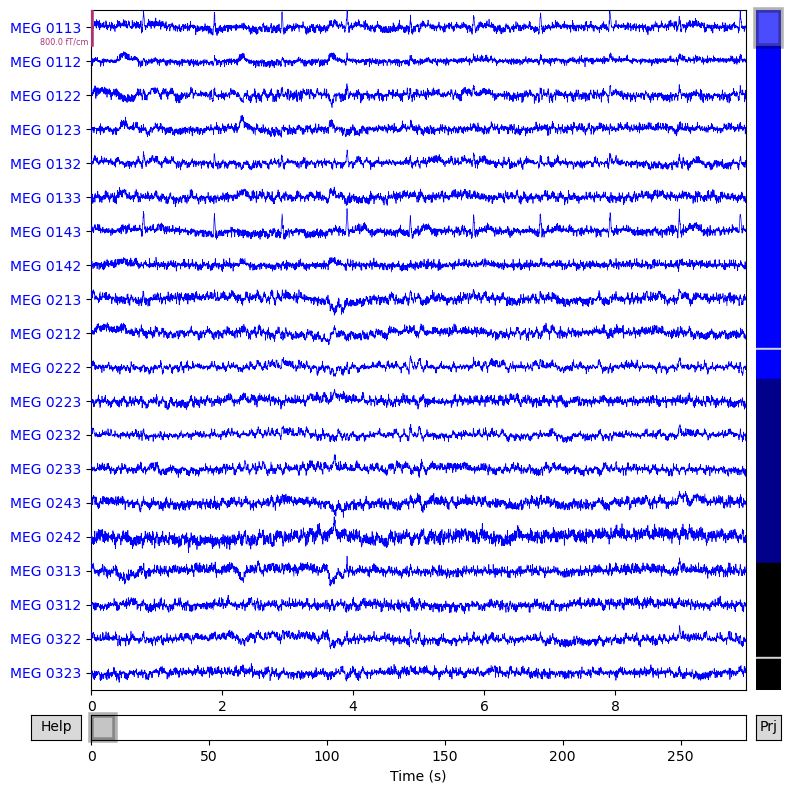

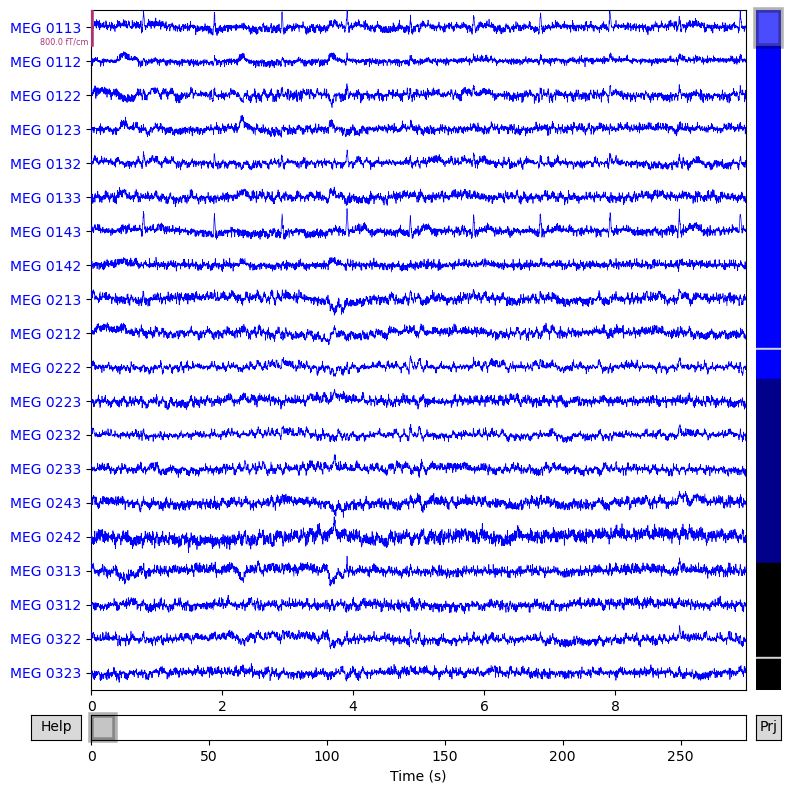

In [9]:
# Loading & Visualizing data
raw_fname = data_path / "MEG" / "sample" / "sample_audvis_raw.fif" #'/' means combine the path. 
# data_path = C:\Users\SJA_010525-01\mne_data\MNE-sample-data so, raw_fname = C:\Users\SJA_010525-01\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif

raw = mne.io.read_raw_fif(raw_fname, preload=True) #mne.io.read_fif: reading the fif flies / preload=True: Loading data into memory for faster processing.
raw.info # Check the raw's mata information.

raw.plot() # Visualizing

In [10]:
print(raw)
print(raw.info)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


C:\Users\SJA_010525-01\anaconda3\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


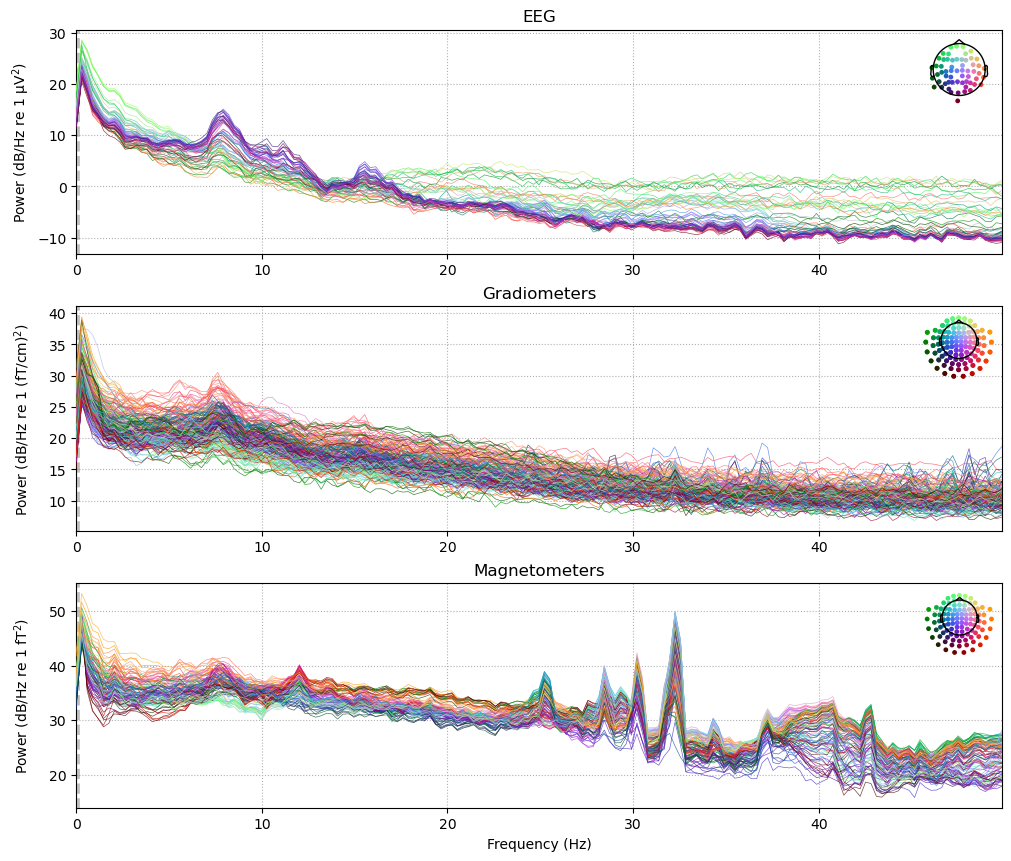

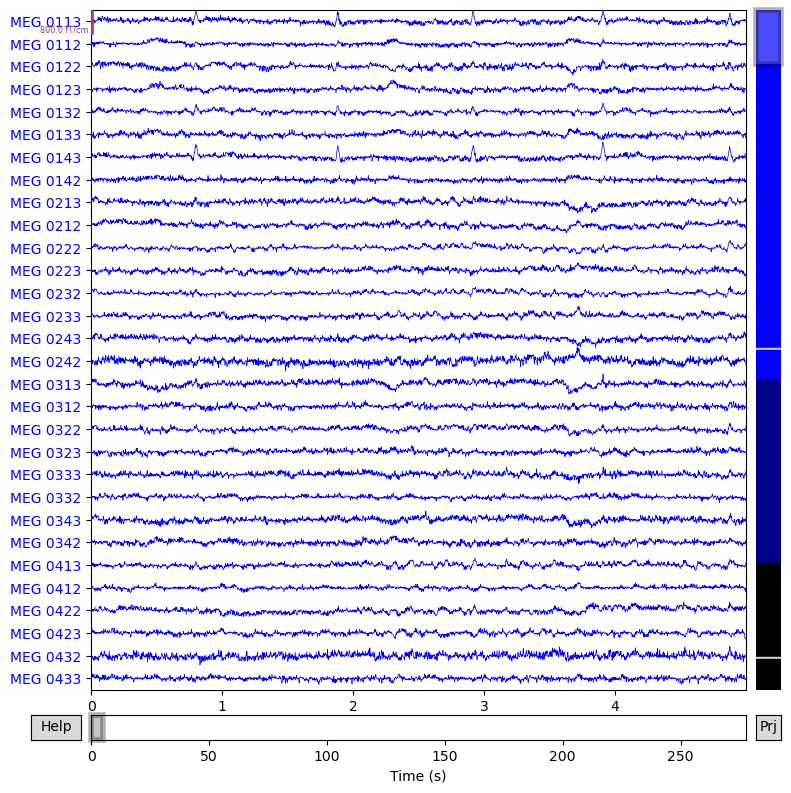

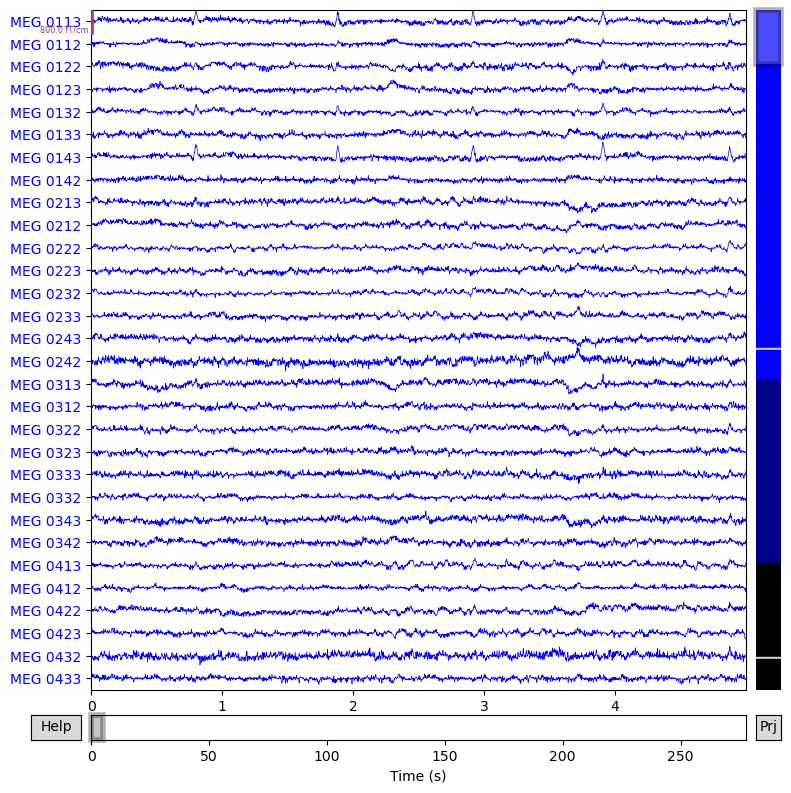

In [16]:
# Calculating & Visualizing PSD(Power Spectral Density)
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
# fmax: compute only 0~50Hz
# picks="data": plot only actual recorded channels (EEG/MEG data)
# amplitude=False: show in PSD units, rather than raw signal amplitude.

# Visualizing in time domain
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 11.4s.


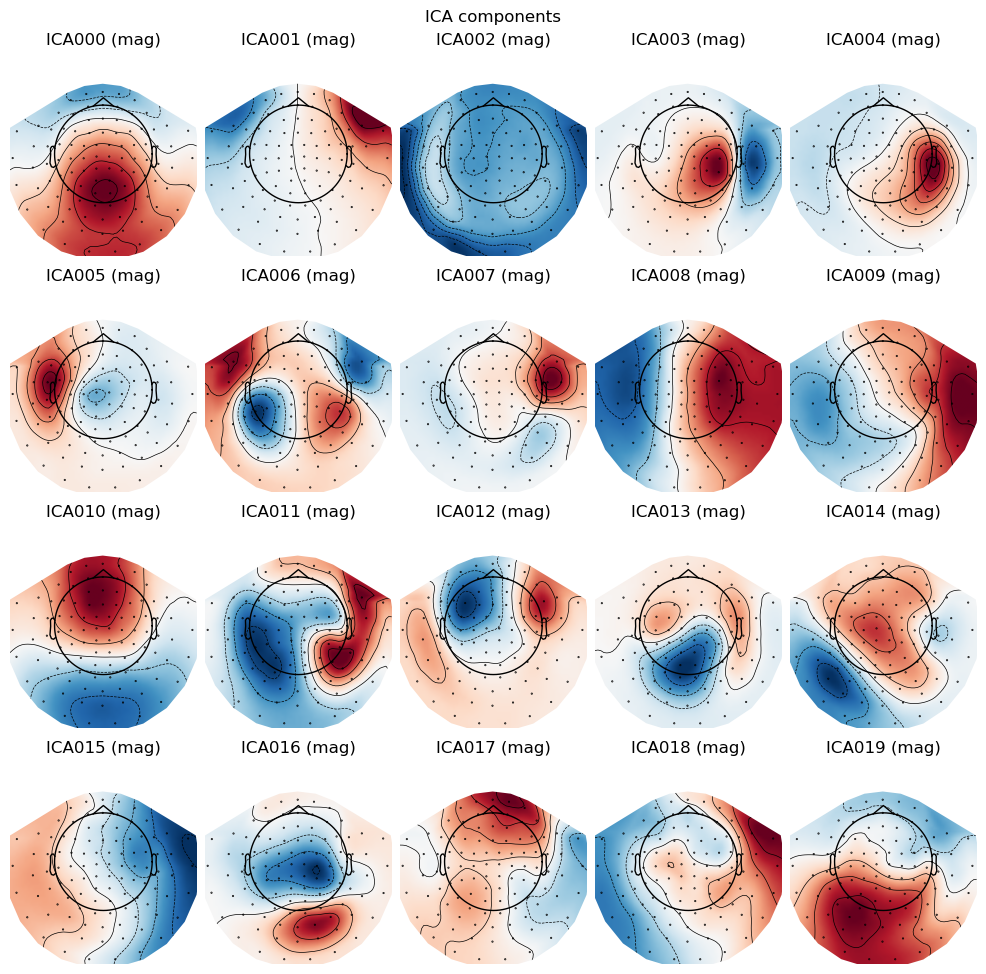

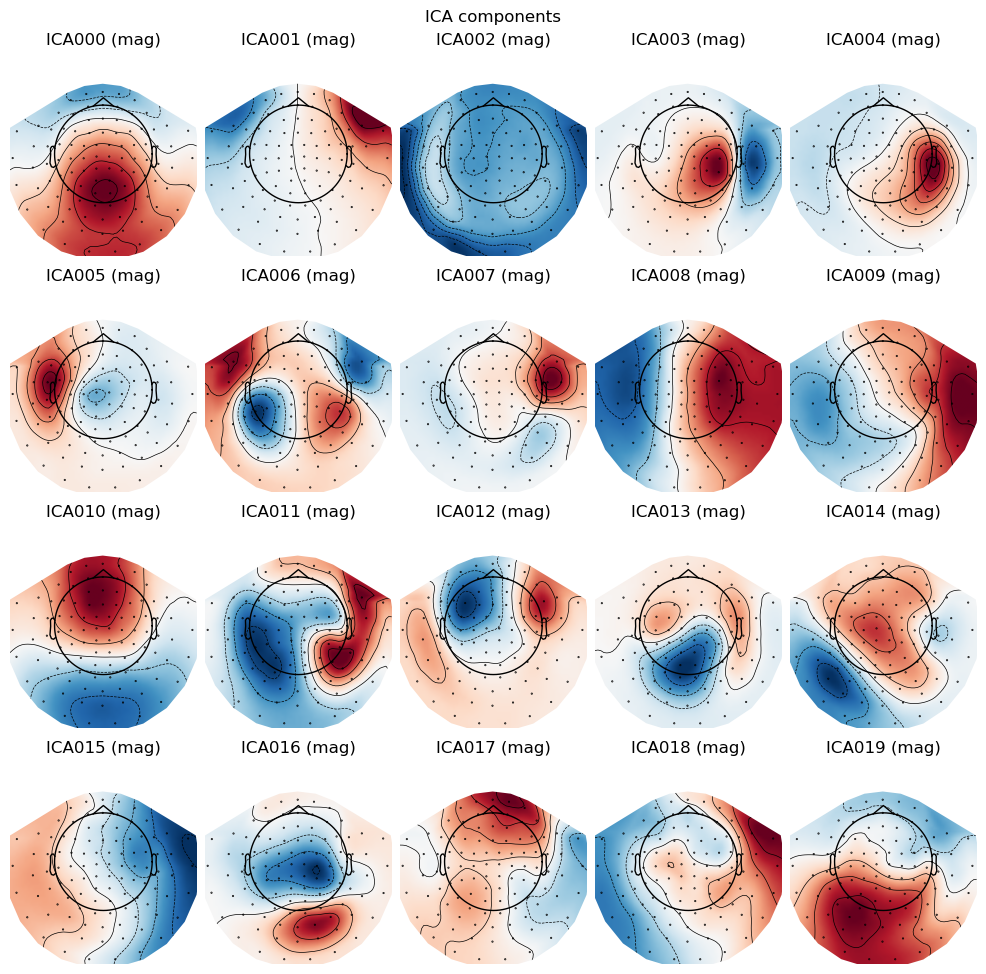

In [19]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw) # Fits the ICA model to the raw data
# random_state: fixes random seed for reproducibility
# max_iter: maximum number of iterations for the algorithm to converge.

# Checking the IC(Independent Component)
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


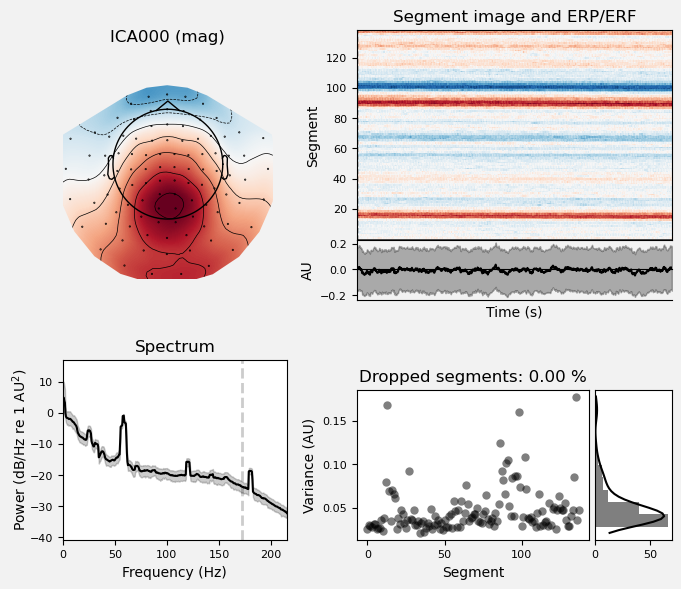

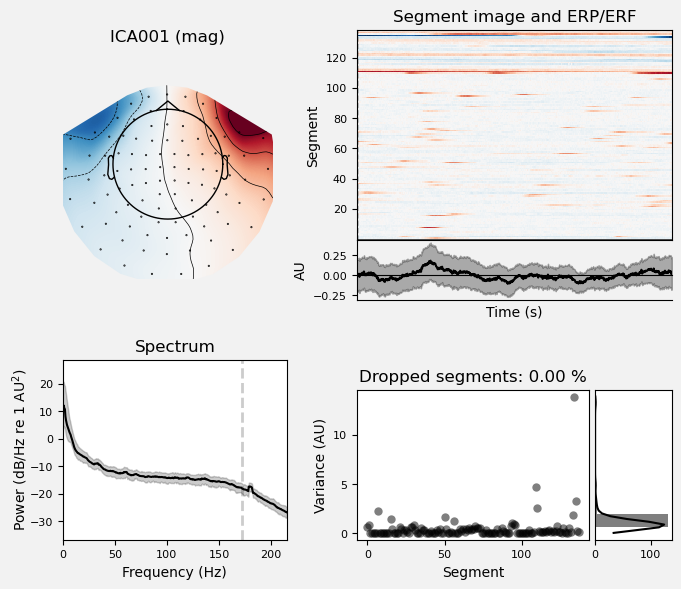

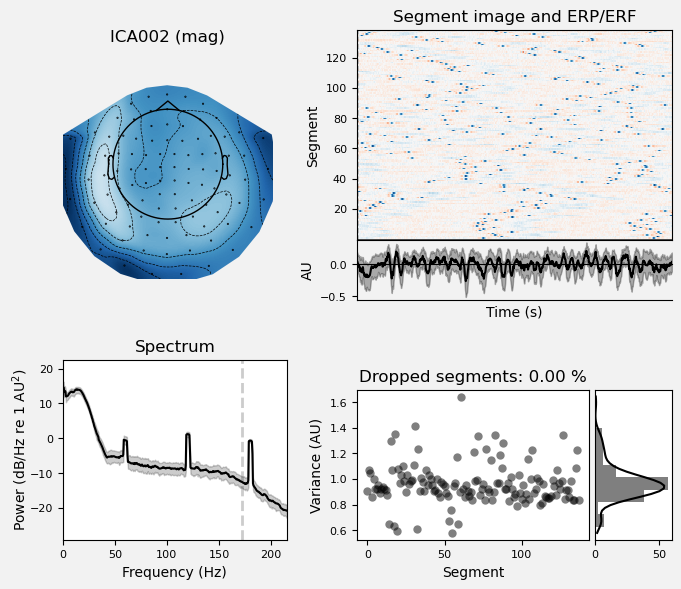

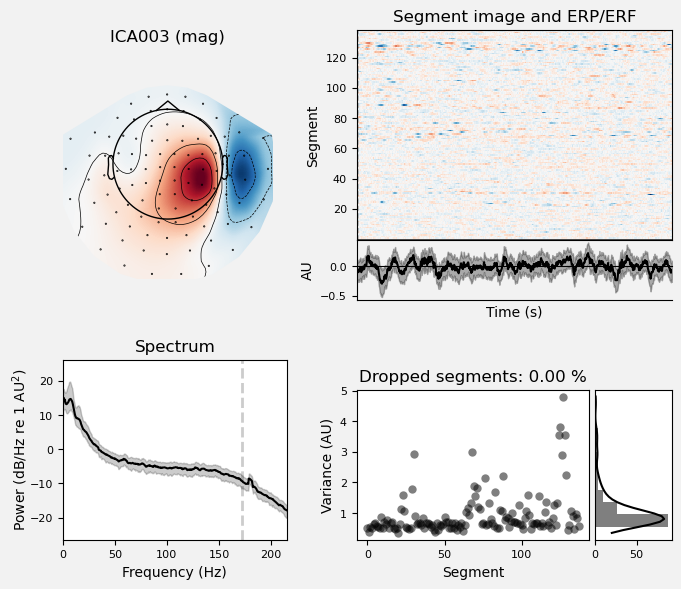

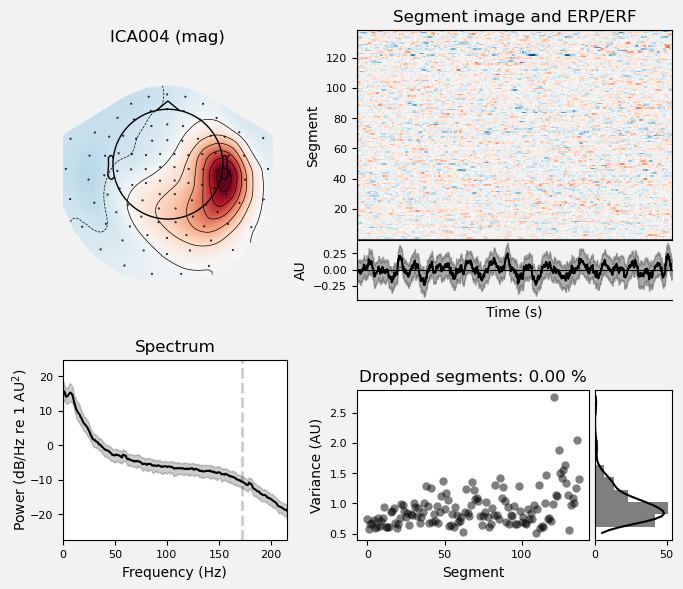

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [22]:
# View IC details
ica.plot_properties(raw, picks=[0,1,2,3,4])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


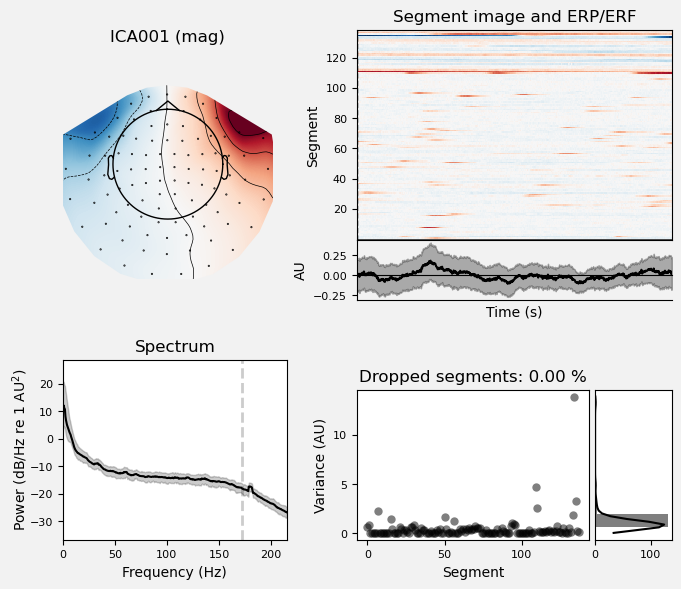

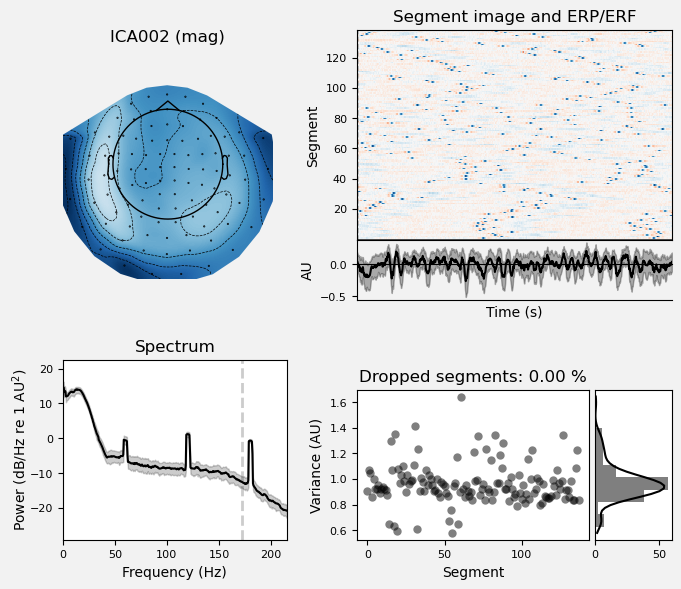

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [24]:
ica.exclude=[1, 2] # remove the components identified as artifacts.
ica.plot_properties(raw, picks=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


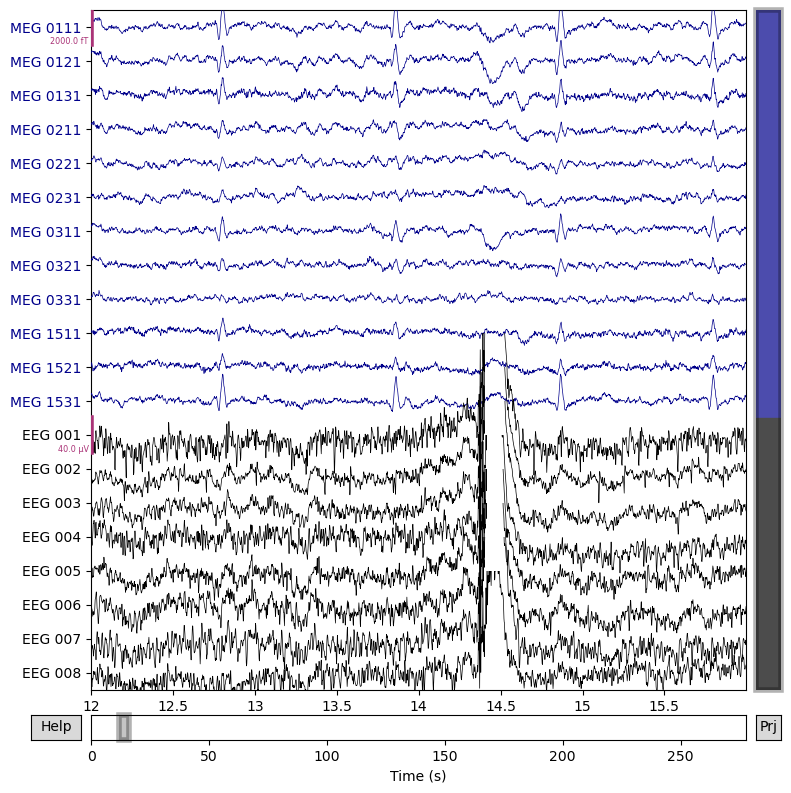

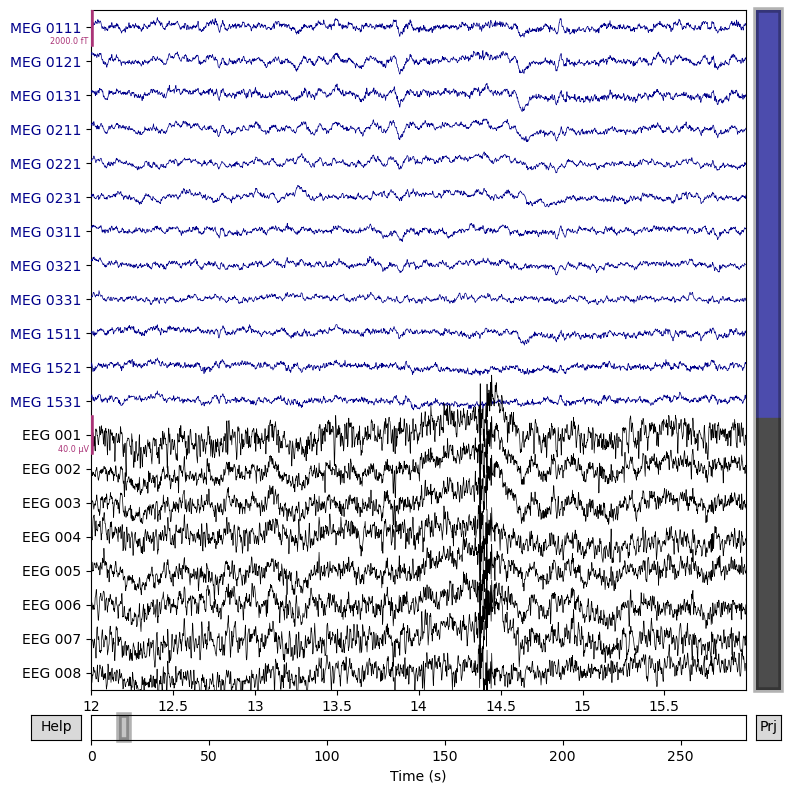

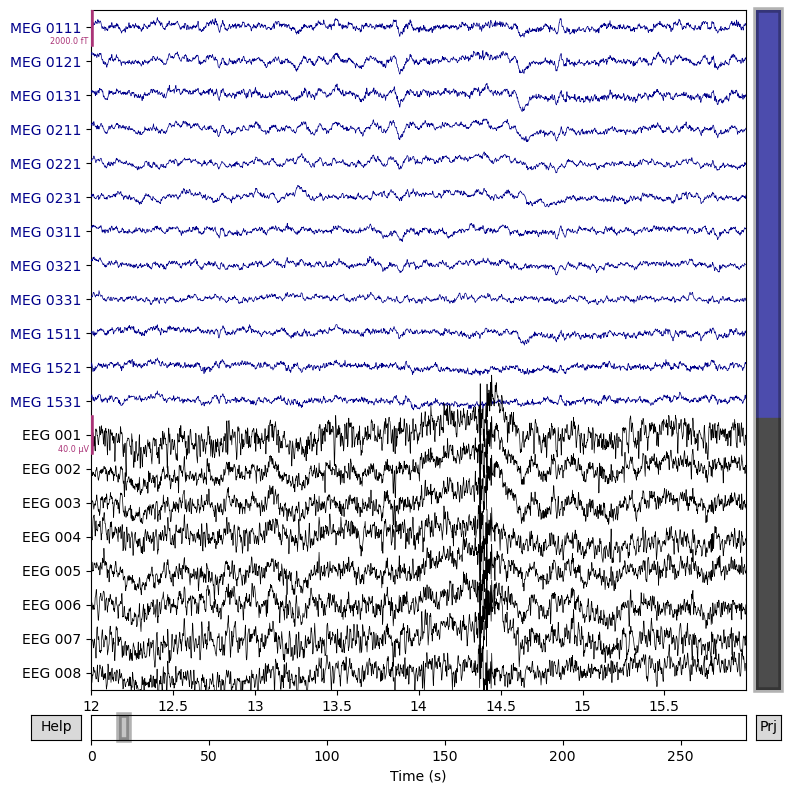

In [25]:
orig_raw = raw.copy()  # Backup the original raw data.
raw.load_data()  # Make sure data is loaded (loaded into the memory).
ica.apply(raw)  # Apply ICA to remove artifacts.

chs = [
    "MEG 0111", "MEG 0121", "MEG 0131",
    "MEG 0211", "MEG 0221", "MEG 0231",
    "MEG 0311", "MEG 0321", "MEG 0331",
    "MEG 1511", "MEG 1521", "MEG 1531",
    "EEG 001", "EEG 002", "EEG 003", "EEG 004",
    "EEG 005", "EEG 006", "EEG 007", "EEG 008",
]

chan_idxs = [raw.ch_names.index(ch) for ch in chs]  # Map channel names to indices.

orig_raw.plot(order=chan_idxs, start=12, duration=4) # Plot before artifact removal
raw.plot(order=chan_idxs, start=12, duration=4)  #Plot after artifact remaval

In [26]:
# Show STIM channels
[ch for ch in raw.ch_names if 'STI' in ch or 'TRIG' in ch]

['STI 001',
 'STI 002',
 'STI 003',
 'STI 004',
 'STI 005',
 'STI 006',
 'STI 014',
 'STI 015',
 'STI 016']

In [28]:
# Detecting experimental events
events = mne.find_events(raw, stim_channel="STI 014")
print(events[:5])

Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


In [29]:
# Mapping events IDs to experimental conditions or events
event_dict ={ 
    "auditory/left" : 1,
    "auditory/right" : 2,
    "visual/left" : 3,
    "visual/right" : 4,
    "smiley" : 5,
    "buttonpress" : 32,
}

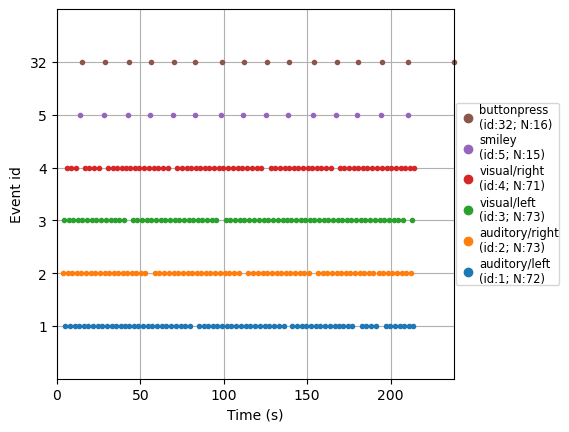

In [31]:
# Visualizing
fig = mne.viz.plot_events(
    events,
    event_id = event_dict,
    sfreq = raw.info["sfreq"],
    first_samp = raw.first_samp
) # sfreq & first_samp bring from the raw data.